

# **Import dependencies**

In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [ ]:
# Load the model
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

# **Preprocess Image and Load**

In [ ]:
def load_image(img_path):
    img = tf.io.read_file(img_path) # reads the image content of the given path
    img = tf.image.decode_image(img, channels=3) # convert to RGB tensor
    img = tf.image.convert_image_dtype(img, tf.float32) # codes pixels to float32 no.
    img = img[tf.newaxis, :] #adds batch dimension
    return img

In [ ]:
content_image = load_image('profile.jpg')
style_image = load_image('monet.jpeg')

# **Visualise Image**

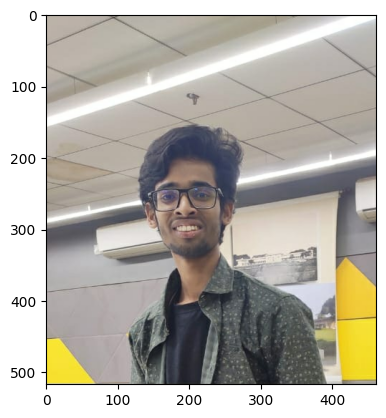

In [ ]:
plt.imshow(np.squeeze(content_image))
plt.show()

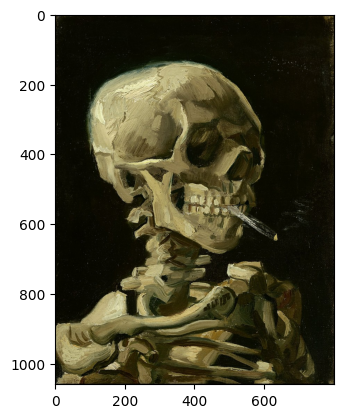

In [ ]:
plt.imshow(np.squeeze(style_image))
plt.show()

# **Style transfer**

In [ ]:
stylised_image=model(tf.constant(content_image),tf.constant(style_image))[0]

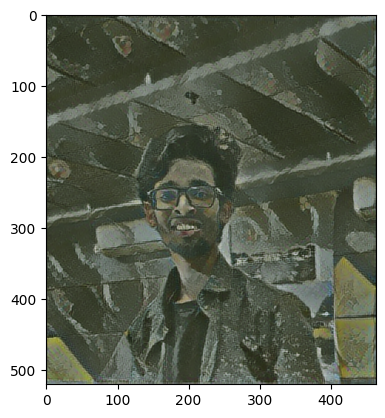

In [ ]:
plt.imshow(np.squeeze(stylised_image))
plt.show()

In [ ]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylised_image)*255, cv2.COLOR_BGR2RGB))

True